In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/nissasyfsgt/DATASET/main/dataset_train.csv', encoding='latin-1')
test = pd.read_csv('https://raw.githubusercontent.com/nissasyfsgt/DATASET/main/dataset_test.csv', encoding='latin-1')
alay_dict = pd.read_csv('https://raw.githubusercontent.com/nissasyfsgt/DATASET/main/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

In [ ]:
print("Shape: ", train.shape)
train.head(15)

Shape:  (10535, 2)


,Tweet,Sentiment
0,\xf0\x9f\x93\x8c Himmler merupakan pimpinan de...,Positive
1,USER Iya anjir dah',Negative
2,"USER Adatuh temen sekelas di sma, dia cakep im...",Positive
3,"USER USER USER USER Mongomong soal ospek, jadi...",Positive
4,Bajingan punya line',Negative
5,Kenali aku lebih dalam. Maka kamu akan mengert...,Negative
6,Dalam acara Back to Campus di Fakultas Ilmu Bu...,Positive
7,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,Positive
8,itu kalo USER beneran otoriter sebagaimana dil...,Positive
9,USER Seperti melihat punuk onta',Positive


In [ ]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [ ]:
import re
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    return text

In [ ]:
train['Tweet'] = train['Tweet'].apply(preprocess)
test['Tweet'] = test['Tweet'].apply(preprocess)

In [ ]:
print("Shape: ", test.shape)
train.head(15)

Shape:  (2634, 2)


,Tweet,Sentiment
0,xf0 x9f x93 x8c himmler merupakan pimpinan di...,Positive
1,iya anjir sudah,Negative
2,ada itu teman sekelas di sama dia cakap imut ...,Positive
3,berbicara soal orientasi studi dan pengenalan...,Positive
4,bajingan punya line,Negative
5,kenali aku lebih dalam maka kamu akan menge i ...,Negative
6,dalam acara back to kampus di fakultas ilmu bu...,Positive
7,aku itu aku dan ku tau matamu sipit tapi dili...,Positive
8,itu kalau benaran otoriter sebagaimana dilabel...,Positive
9,sepe i melihat punuk onta,Positive


In [ ]:
print("TRAIN size:", len(train))
print("TEST size:", len(test))

TRAIN size: 10535
TEST size: 2634


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
SEQUENCE_LENGTH=300
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train.Tweet)

vocab_size = len(tokenizer.word_index) +1
print("Total words", vocab_size)

Total words 17765


In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train.Tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test.Tweet), maxlen=SEQUENCE_LENGTH)

In [ ]:
labels = train.Sentiment.unique().tolist()
labels

['Positive', 'Negative']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train.Sentiment.tolist())

y_train = encoder.transform(train.Sentiment.tolist())
y_test = encoder.transform(test.Sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (10535, 1)
y_test (2634, 1)


In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (10535, 300)
y_train (10535, 1)

x_test (2634, 300)
y_test (2634, 1)


In [ ]:
y_train[:10]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
documents = [_Tweet.split() for _Tweet in train.Tweet] 

In [ ]:
import gensim
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)



w2v_model.build_vocab(documents)

In [ ]:
words = list(w2v_model.wv.key_to_index.keys())
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 2357


In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(4342044, 6216160)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i-1] = w2v_model.wv[word]
print(embedding_matrix.shape)

(2357, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(units=64, recurrent_dropout = 0.3, dropout = 0.3, 
                             return_sequences = True)))
model.add(Bidirectional(LSTM(units=32, recurrent_dropout = 0.1, dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          707100    
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         186880    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 935,261
Trainable params: 228,161
Non-trainable params: 707,100
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
149/149 [==============================] - 1351s 9s/step - loss: 0.5454 - acc: 0.7212 - val_loss: 0.4393 - val_acc: 0.8055 - lr: 0.0010
Epoch 2/8
149/149 [==============================] - 1454s 10s/step - loss: 0.4099 - acc: 0.8177 - val_loss: 0.3745 - val_acc: 0.8444 - lr: 0.0010
Epoch 3/8
149/149 [==============================] - 1431s 9s/step - loss: 0.3473 - acc: 0.8524 - val_loss: 0.3510 - val_acc: 0.8567 - lr: 0.0010
Epoch 4/8
149/149 [==============================] - 1438s 10s/step - loss: 0.3037 - acc: 0.8711 - val_loss: 0.3570 - val_acc: 0.8615 - lr: 0.0010
Epoch 5/8
149/149 [==============================] - 1274s 9s/step - loss: 0.2686 - acc: 0.8933 - val_loss: 0.3688 - val_acc: 0.8795 - lr: 0.0010
Epoch 6/8
149/149 [==============================] - 1377s 9s/step - loss: 0.2449 - acc: 0.9017 - val_loss: 0.3143 - val_acc: 0.8738 - lr: 0.0010
Epoch 7/8
149/149 [==============================] - 1199s 8s/step - loss: 0.2226 - acc: 0.9112 - val_loss: 0.3396 - val_a

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

42/42 [==============================] - 48s 1s/step - loss: 0.3469 - acc: 0.8713

ACCURACY: 0.8712984323501587
LOSS: 0.34686481952667236


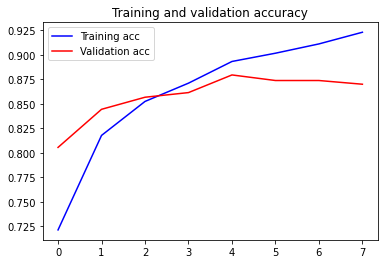

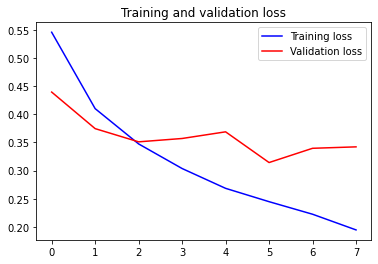

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
def decode_sentiment(score):
    return "Negative" if score < 0.05 else "Positive"

In [ ]:
def predict(text):
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label, "score": float(score)}

In [ ]:
predict("kamu sangat jelek")

1/1 [==============================] - 40s 40s/step


{'label': 'Negative', 'score': 0.02156156860291958}

In [ ]:
predict("kamu sangat cantik")

1/1 [==============================] - 0s 251ms/step


{'label': 'Positive', 'score': 0.061863142997026443}

In [ ]:
predict("bangsat")

1/1 [==============================] - 0s 203ms/step


{'label': 'Negative', 'score': 0.00942191295325756}

In [ ]:
model.save("text_sentiment")

INFO:tensorflow:Assets written to: text_sentiment\assets


In [ ]:
!ls text_sentiment

'ls' is not recognized as an internal or external command,
operable program or batch file.
